In [1]:
import os
import glob
import importlib
import pandas as pd
import numpy as np

import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.arousal.parse_face_data as pf
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils.helpers as hutils

In [2]:
# Pupil -------------------------------------------
pupil_feature='pupil_fraction'
pupil_epoch='stimulus'
pupil_snapshot=391800
redo_pupil=False
pupil_framerate=20.
eyetracker_dir = '/n/coxfs01/2p-data/eyetracker_tmp'
# -------------------------------------------------
alignment_type='trial'

#### parse_pose_data()

In [28]:
# animalid ='JC084'
# session='20190525'
# fov='FOV1_zoom2p0x'

datakey = '20190525_JC084_fov1'
experiment='gratings'
session, animalid, fovnum = hutils.split_datakey_str(datakey)

traceid='traces001'
rootdir='/n/coxfs01/2p-data'
snapshot=391800
iti_pre=1.
iti_post=1.
verbose=False

In [443]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [449]:
# Test loading, output of:  dlcutils.parse_pose_data()
# dlcutils.aggregate_traces() calls this
recombine=False
realign=False
fov_traces, fov_params = dlcutils.load_fov_traces(datakey, experiment,
                                                  alignment_type=alignment_type)
fov_traces.head()

if 'cr_dist' not in fov_traces.columns:
    recombine=True
    print("... old pupil data, recombine.")

In [450]:
fov_traces.head()

,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist,snout_area,whiskerP,whiskerP1,whiskerP2,whiskerP3,...,whiskerAL3,run_label,run_num,pupil_fraction,config,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms
19,5.228245,4.789329,78.664809,17.218617,0.038722,6722.816040,0.821389,0.847583,0.857773,1.121227,...,1.082901,1,1,0.223391,config030,1,500.0,1000.0,1000.0,2000.0
20,5.260439,4.828499,79.796533,17.193034,0.099199,6688.027988,0.162608,0.307390,0.411509,0.377193,...,0.263089,1,1,0.226605,config030,1,500.0,1000.0,1000.0,2000.0
21,5.277987,4.799067,79.574692,17.149218,0.043579,6812.611763,0.317116,0.666857,0.744814,0.832979,...,0.717446,1,1,0.225975,config030,1,500.0,1000.0,1000.0,2000.0
22,5.285391,4.815598,79.960813,17.965550,0.058106,6833.464043,0.743216,0.605137,0.783685,1.080134,...,0.231078,1,1,0.227072,config030,1,500.0,1000.0,1000.0,2000.0
23,5.343534,4.815553,80.839691,17.203351,0.041182,6803.218565,0.021350,0.040333,0.042068,0.045590,...,0.064574,1,1,0.229567,config030,1,500.0,1000.0,1000.0,2000.0


In [446]:
#### Load pupil data
feature_list = ['pupil', 'snout', 'whisker']
recombine=True
trialmeta, pupildata, params = dlcutils.get_pose_data(
                                        datakey, experiment, 
                                        realign=realign, recombine=recombine,
                                        feature_list=feature_list, #[feature_name], 
                                        alignment_type=alignment_type,
                                        iti_pre=iti_pre, iti_post=iti_post,
                                        verbose=verbose, snapshot=snapshot,
                                        eyetracker_dir=eyetracker_dir)

Calculating pose metrics per trial (20190525_JC084_fov1)
... done parsing!


In [447]:
pupildata.head()

,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist,snout_area,whiskerP,whiskerP1,whiskerP2,whiskerP3,...,whiskerAU1,whiskerAU2,whiskerAU3,whiskerAL,whiskerAL1,whiskerAL2,whiskerAL3,run_label,run_num,pupil_fraction
0,5.241800,4.768644,78.528134,17.889120,NaN,6799.911346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0.223003
1,5.286308,4.814593,79.957993,17.232053,0.022751,6781.419159,0.070597,0.074498,0.105520,0.230951,...,0.178034,0.357119,0.475609,0.218784,0.183079,0.168687,0.181489,1,1,0.227064
2,5.355503,4.799710,80.754211,17.864559,0.093652,6799.555446,0.686305,0.376963,0.517548,0.615881,...,0.444744,0.813682,1.181891,0.059676,0.030746,0.092681,0.140045,1,1,0.229325
3,5.349437,4.796536,80.609405,17.170891,0.044725,6882.048486,0.130728,0.625551,0.959613,1.393069,...,0.676315,1.177567,1.495824,0.285967,0.416205,0.670936,0.702522,1,1,0.228913
4,5.396008,4.816670,81.652482,17.932423,0.028314,6884.962490,0.468183,0.078668,0.041343,0.085916,...,0.025148,0.090647,0.162546,0.052508,0.019449,0.052634,0.050035,1,1,0.231876


In [448]:
# #### Parse traces into trials
# # Get labels
# labels = aggr.load_frame_labels(datakey, experiment, 
#                             traceid=traceid, rootdir=rootdir)
# print(labels.head())

# # Parse
# pupiltraces, missing_trials = dlcutils.traces_to_trials(trialmeta, pupildata, labels,
#                     return_missing=True, verbose=False)
# trialmeta, pupildata = dlcutils.add_trial_labels(trialmeta, pupildata, labels)
# trialmeta.head()
if realign or recombine:
    ptraces, params = dlcutils.align_traces(datakey, experiment,
                                        trialmeta, pupildata, params)

Splitting traces into trials
... Missing 0 trials total
Saved.


In [36]:
# Combines:
# dlcutils.get_pose_data()
# dlcutils.traces_to_trials()
# realign=True
# recombine=False
# ptraces, params = dlcutils.parse_pose_data(datakey, experiment, 
#                                   feature_name=pupil_feature, 
#                                   alignment_type=alignment_type,
#                                   realign=realign, recombine=recombine)                              

['whiskerP', 'whiskerP1', 'whiskerP2', 'whiskerP3', 'whiskerAU', 'whiskerAU1', 'whiskerAU2', 'whiskerAU3', 'whiskerAL', 'whiskerAL1', 'whiskerAL2', 'whiskerAL3']


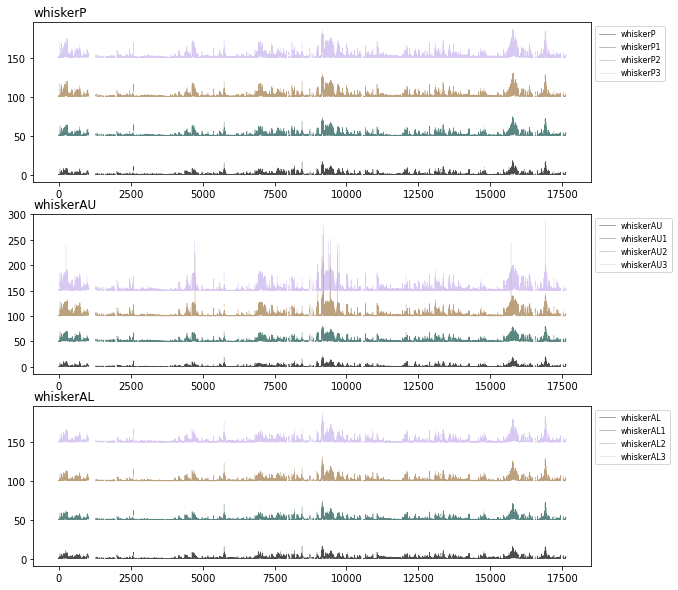

In [471]:
df_ = pupildata[pupildata['run_num']==1].copy()
feat_list = [k for k in df_.columns if 'whisker' in k]
print(feat_list)
whisk_cmap = pl.cm.get_cmap('cubehelix', 5)
whisker_prefixes = ['P', 'AU', 'AL']

fig, axn = pl.subplots(3, 1, figsize=(10, 10))
for ai, (ax, wh) in enumerate(zip(axn.flat, whisker_prefixes)):
    feat_list = [k for k in df_.columns if 'whisker%s' % wh in k]
    for fi, feat in enumerate(feat_list):
        offset = 50
        ax.plot(df_[feat]+ (offset*fi), color=whisk_cmap(fi),
               lw=0.5, alpha=0.7, label=feat)
    ax.set_title('whisker%s' % wh, loc='left')
    ax.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize=8)

In [473]:
df_[feat_list]

,whiskerAL,whiskerAL1,whiskerAL2,whiskerAL3
0,NaN,NaN,NaN,NaN
1,0.218784,0.183079,0.168687,0.181489
2,0.059676,0.030746,0.092681,0.140045
3,0.285967,0.416205,0.670936,0.702522
4,0.052508,0.019449,0.052634,0.050035
...,...,...,...,...
17622,2.808039,3.466917,4.357392,4.724255
17623,1.030962,1.476960,2.430002,2.110482
17624,1.870499,2.681672,2.736779,3.278994
17625,NaN,NaN,NaN,NaN


#### Calculate trial metrics

In [451]:
fov_metrics, fov_metric_params = dlcutils.parsed_traces_to_metrics(
                                        fov_traces, fov_params,
                                        in_rate=pupil_framerate, 
                                        out_rate=pupil_framerate,
                                        trial_epoch=pupil_epoch, 
                                        iti_pre=iti_pre, iti_post=iti_post)

In [452]:
print(fov_metrics.shape)
fov_metrics.head()

(1280, 28)


,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist,snout_area,whiskerP,whiskerP1,whiskerP2,whiskerP3,...,run_label,run_num,pupil_fraction,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,frame_ix
0,8.560196,7.335229,197.299907,17.645734,0.062470,6038.042657,0.484080,1.746933,2.788684,3.098791,...,1.0,1.0,0.560289,1.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
1,9.573570,8.124020,244.348020,17.557747,0.076786,6857.522582,0.117329,0.556724,1.050602,1.587876,...,1.0,1.0,0.693896,2.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
2,8.553457,7.532737,202.415966,17.949380,0.290195,6247.692068,5.060253,8.615126,11.753881,14.127084,...,1.0,1.0,0.574818,3.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
3,8.506978,7.347939,196.377202,17.596078,0.047708,5963.479902,3.286021,5.905601,7.869904,9.556485,...,1.0,1.0,0.557669,4.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
4,8.392333,7.392758,194.915769,17.703747,0.253499,7627.847218,6.736059,9.730803,11.285172,13.315069,...,1.0,1.0,0.553519,5.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5


In [453]:
fov_metrics.tail()

,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist,snout_area,whiskerP,whiskerP1,whiskerP2,whiskerP3,...,run_label,run_num,pupil_fraction,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,frame_ix
1275,4.603467,5.285235,76.436955,17.151899,0.069239,6734.593764,0.545216,0.220918,0.255700,0.376780,...,4.0,4.0,0.217065,1276.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
1276,6.796762,6.528717,139.406954,17.382275,0.720781,6346.693060,0.073251,0.219535,0.238307,0.463462,...,4.0,4.0,0.395886,1277.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
1277,6.038917,6.163494,116.945421,17.131725,0.041813,6455.958378,0.094611,0.077152,0.078162,0.063281,...,4.0,4.0,0.332100,1278.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
1278,7.684365,7.152516,172.681221,17.246890,0.058138,6648.588498,0.110099,0.149694,0.237978,0.246133,...,4.0,4.0,0.490378,1279.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5
1279,7.999485,7.119765,178.928391,17.655411,0.292384,6894.246797,0.103550,0.406040,0.468082,0.754323,...,4.0,4.0,0.508118,1280.0,500.0,1000.0,1000.0,2000.0,20.0,5019.5


# Check frames

In [45]:
import cv2
import pylab as pl
%matplotlib notebook

In [47]:
src_dirs = dlcutils.get_raw_experiment_dirs(datakey, experiment='gratings')
for s in src_dirs:
    print(s)

... finding all movies for dset: 20190525_JC084_fov1
/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f1_20190525143106359207
/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f2_20190525153044945713
/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f3_20190525162127582536
/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f4_20190525173906136529


In [48]:
for s, (p, g) in zip(src_dirs, pupildata.groupby(['run_num'])):
    print(s)
    vidmeta = dlcutils.get_video_metadata_for_run(s)
    print(vidmeta[['frame_count', 'expected_frame_count']])
    print('... parsed run %i, %i frames' % (p, len(g)))

/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f1_20190525143106359207
   frame_count  expected_frame_count
0        17627                 17634
... parsed run 1, 17627 frames
/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f2_20190525153044945713
   frame_count  expected_frame_count
0        17693                 17694
... parsed run 2, 17693 frames
/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f3_20190525162127582536
   frame_count  expected_frame_count
0        17997                 17998
... parsed run 3, 17997 frames
/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f4_20190525173906136529
   frame_count  expected_frame_count
0        20701                 20714
... parsed run 4, 20701 frames


In [53]:
in_rate=20.
out_rate=20.
video_rate=out_rate

run_num = 1
trial_num = 1
plot_trials = False

nsec_plot = 20*1

stim_dur = fov_params['stim_dur']
stim_on = int(round(iti_pre*out_rate))
nframes_on = int(round(stim_dur*out_rate))

feat='pupil_area'
curr_src = src_dirs[run_num-1]
if plot_trials:
    rundf = fov_traces[fov_traces['run_num']==run_num].copy()
    frame_ixs = rundf[rundf['trial']==trial_num].index.tolist()
else:
    rundf = pupildata[pupildata['run_num']==run_num].copy()
    nframes_plot = nsec_plot * video_rate
    frame_ixs = np.arange(0, nframes_plot).astype(int) 

plotdf = rundf.loc[frame_ixs].copy()


In [54]:

all_frames = sorted(glob.glob(os.path.join(curr_src, 'frames','*.png')),
                         key=hutils.natural_keys) # os.listdir(src_dirs[0])
all_frames[0:5]

['/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f1_20190525143106359207/frames/1.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f1_20190525143106359207/frames/2.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f1_20190525143106359207/frames/3.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f1_20190525143106359207/frames/4.png',
 '/n/coxfs01/2p-data/eyetracker_tmp/20190525_JC084_fov1_gratings_f1_20190525143106359207/frames/5.png']

In [132]:

# curr_frames = sorted(glob.glob(os.path.join(curr_src, 'frames','*.png')),
#                         key=hutils.natural_keys) # os.listdir(src_dirs[0])
# len(curr_frames)
framedict={}
for ix in frame_ixs:
    fp = os.path.join(curr_src, 'frames', '%i.png' % int(ix+1))
    im = cv2.imread(fp) #, 0)
    framedict[ix] = im

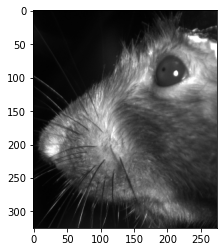

In [133]:
pl.figure()
#x0, x1 = 0, 200
# y0, y1 = 250, 450
x0, x1 = 75, 400
y0, y1 = 125, 400

pl.imshow(im[x0:x1, y0:y1])

In [68]:
# feat='pupil_area'

# fig, axn = pl.subplots(4,5, figsize=(8,10))
# for ax, ix in zip(axn.flat, frame_ixs[0::2]):
#     im = framedict[ix].copy()
#     ax.imshow(im[x0:x1, y0:y1],extent=(0,1,1,0), cmap='gray')
#     ax.axis('tight')
#     val = plotdf[feat].loc[ix]
#     ax.set_title('f%i, %.1f' % (ix, val), loc='left', fontsize=6)
#     ax.axis('off')
# pl.subplots_adjust(left=0, right=1)

# Plot video

In [69]:
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [70]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

#### Set save dir

In [71]:
aggregate_dir='/n/coxfs01/julianarhee/aggregate-visual-areas'
output_dir = os.path.join(aggregate_dir, 'behavior-state', 'pupil')
print(output_dir)

/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/pupil


In [72]:
%matplotlib inline

#### Get dlc coords

In [335]:
from skimage.draw import circle_perimeter, circle, line,line_aa
import matplotlib as mpl

In [103]:
dlc_results_dir, dlc_video_dir = dlcutils.get_dlc_sources()
dlc_outfiles = sorted(glob.glob(os.path.join(dlc_results_dir, 
                    '%s_%s_f*_%i.h5' % (datakey, experiment, snapshot))), 
                      key=hutils.natural_keys)   
for d in dlc_outfiles:
    print(os.path.split(d)[-1])

20190525_JC084_fov1_gratings_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190525_JC084_fov1_gratings_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190525_JC084_fov1_gratings_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190525_JC084_fov1_gratings_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5


In [107]:
run_num=1

dlc_outfile = dlc_outfiles[run_num-1]

df = pd.read_hdf(dlc_outfile)
DLCscorer = df.columns.get_level_values(level=0).unique()[0]
DLCscorer = df.columns.get_level_values(level=0).unique()[0]
tmpdf = df[DLCscorer].copy()
tmpdf.shape
assert tmpdf.shape[0] == pupildata[pupildata['run_num']==run_num].shape[0]


(17627, 81)

In [329]:
pupil_names = ['pupilT', 'pupilB', 'pupilL', 'pupilR', 'cornealR']
whisker_names = ['whiskerP', 'whiskerP1', 'whiskerP2', 'whiskerP3',
           'whiskerAU', 'whiskerAU1', 'whiskerAU2', 'whiskerAU3',
           'whiskerAL', 'whiskerAL1', 'whiskerAL2', 'whiskerAL3']
bodyparts2plot = pupil_names + whisker_names
print(bodyparts2plot)

['pupilT', 'pupilB', 'pupilL', 'pupilR', 'cornealR', 'whiskerP', 'whiskerP1', 'whiskerP2', 'whiskerP3', 'whiskerAU', 'whiskerAU1', 'whiskerAU2', 'whiskerAU3', 'whiskerAL', 'whiskerAL1', 'whiskerAL2', 'whiskerAL3']


In [398]:
# deeplabcut.utils.make_labeled_video.py() - from CreateVideo():
bodyparts2connect = [('pupilT', 'pupilB'), ('pupilL', 'pupilR')]
w1 = ('whiskerP', 'whiskerP1', 'whiskerP2', 'whiskerP3')
w2 = ('whiskerAU', 'whiskerAU1', 'whiskerAU2', 'whiskerAU3')
w3 = ('whiskerAL', 'whiskerAL1', 'whiskerAL2', 'whiskerAL3')
bodyparts2connect.extend([w1, w2, w3])
index=np.arange(len(bodyparts2plot))
bpts2connect=[]
for pair in bodyparts2connect:
    print(pair)
    bpts2connect.append([bodyparts2plot.index(pair[0]), 
                         bodyparts2plot.index(pair[1])])

('pupilT', 'pupilB')
('pupilL', 'pupilR')
('whiskerP', 'whiskerP1', 'whiskerP2', 'whiskerP3')
('whiskerAU', 'whiskerAU1', 'whiskerAU2', 'whiskerAU3')
('whiskerAL', 'whiskerAL1', 'whiskerAL2', 'whiskerAL3')


In [399]:
# Turn values into array
nframes = len(tmpdf.index)
df_likelihood = np.empty((len(bodyparts2plot),nframes))
df_x = np.empty((len(bodyparts2plot),nframes))
df_y = np.empty((len(bodyparts2plot),nframes))
for bpindex, bp in enumerate(bodyparts2plot):
    df_likelihood[bpindex,:]=tmpdf[bp,'likelihood'].values
    df_x[bpindex,:]=tmpdf[bp,'x'].values
    df_y[bpindex,:]=tmpdf[bp,'y'].values

In [413]:
def get_defauult_colorlist(n=20, cmap='hsv'):
    colorclass=pl.cm.ScalarMappable(cmap=colormap)
    C=colorclass.to_rgba(np.linspace(0,1,n))
    colors1=(C[:,:3]*255).astype(np.uint8)
    return colors
    
def draw_frame(index, framedict, df_x, df_y, df_likelihood, 
               bpts2connect=[None], bodyparts2plot=[],
               dotsize=5, pcutoff=0.9, 
               color_for_skeleton=(75, 75, 75), colors=None):
    
    if colors is None:
        colors = get_defauult_colorlist(cmap=cmap, n=n)
        

    image = framedict[frame_ixs[index]].copy()
    ny, nx, _ = image.shape
    for pair in bpts2connect:
        if (df_likelihood[pair[0],index] > pcutoff) \
            and (df_likelihood[pair[1],index] >pcutoff):
            rr, cc,val = line_aa(int(np.clip(df_y[pair[0],index],0,ny-1)),
                                 int(np.clip(df_x[pair[0],index],0,nx-1)), 
                                 int(np.clip(df_y[pair[1],index],1,ny-1)), 
                                 int(np.clip(df_x[pair[1],index],1,nx-1)))
            image[rr, cc, :] = color_for_skeleton

    #for bpindex in range(len(bodyparts2plot)):
    for bpindex, bp in enumerate(bodyparts2plot):
        if df_likelihood[bpindex,index] > pcutoff:
            xc = int(df_x[bpindex,index])
            yc = int(df_y[bpindex,index])
            rr, cc = circle(yc,xc,dotsize,shape=(ny,nx))
            image[rr, cc, :] = colors[bpindex]
        else:
            print(bodyparts2plot[bpindex], 'nan')
            
    return image

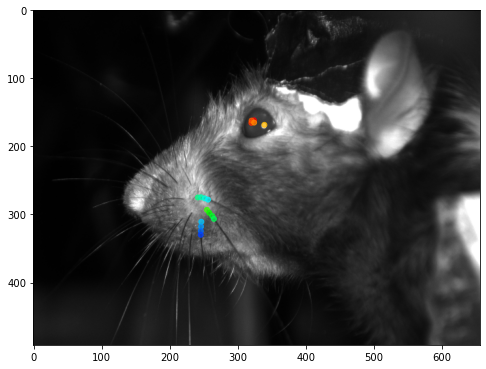

In [376]:
# im = framedict[frame_ixs[0]]

# # # as plot.
# alphavalue=0.75
# bp_colors = pl.cm.get_cmap('hsv', len(bodyparts)+7)
# bp_colorlist = [bp_colors(i) for i, bp in enumerate(pupil_names)]
# nskip = len(pupil_names)
# bp_colorlist2 = [bp_colors(i+nskip) for i, bp in enumerate(bodyparts2plot) \
#                 if bp not in pupil_names]
# bp_colorlist.extend(bp_colorlist2)

# pl.figure(figsize=(8,8))
# pl.imshow(im)

# pl.scatter(
#     df_x[:,index],
#     df_y[:,index],
#     s=dotsize**2,
#     c=bp_colorlist,
#     alpha=alphavalue)


In [414]:
# Set plot params for vid
skeleton_color=[0.3]*3
color_for_skeleton = (np.array(mpl.colors.to_rgba(skeleton_color))[:3]*255).astype(np.uint8)
dotsize=5
alphavalue=0.6

In [415]:
# Set colors
bodyparts = tmpdf.columns.get_level_values(level=0).unique().tolist()
colormap='hsv'
#bp_colors = pl.cm.get_cmap(cmap, len(bodyparts2plot))
colorclass=pl.cm.ScalarMappable(cmap=colormap)
C=colorclass.to_rgba(np.linspace(0,1,len(bodyparts)))
# colors=(C[:,:3]*255).astype(np.uint8)
nskip = 3
npupil=len(pupil_names)
colors1=(C[0:npupil,:3]*255).astype(np.uint8)
colors2=(C[npupil+nskip:,:3]*255).astype(np.uint8)
colors = np.vstack([colors1, colors2])

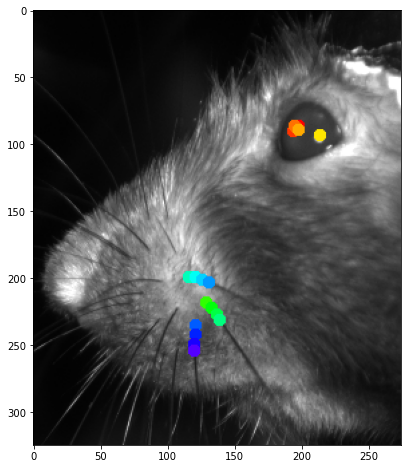

In [416]:
pcutoff=0.9
index=10
# Draw on image (sample)
im = draw_frame(index, framedict, df_x, df_y, df_likelihood, 
               bpts2connect=bpts2connect, bodyparts2plot=bodyparts2plot,
               dotsize=dotsize, pcutoff=pcutoff,
               color_for_skeleton=color_for_skeleton,
               colors=colors)

pl.figure(figsize=(8,8))
pl.imshow(im[x0:x1, y0:y1])


In [68]:
# feat='pupil_area'

# fig, axn = pl.subplots(4,5, figsize=(8,10))
# for ax, ix in zip(axn.flat, frame_ixs[0::2]):
#     im = framedict[ix].copy()
#     ax.imshow(im[x0:x1, y0:y1],extent=(0,1,1,0), cmap='gray')
#     ax.axis('tight')
#     val = plotdf[feat].loc[ix]
#     ax.set_title('f%i, %.1f' % (ix, val), loc='left', fontsize=6)
#     ax.axis('off')
# pl.subplots_adjust(left=0, right=1)

# Make movie

In [94]:
def convert_coords_for_movie(yv, hmin=10, hmax=50):
    newy = hutils.convert_range(np.array(yv), 
                    oldmin=np.nanmin(yv), oldmax=np.nanmax(yv), 
                    newmin=hmin, newmax=hmax)
    return newy

In [75]:
# Get stimulus onset frame indices 
stim_on_ixs = [sorted(g.index.tolist())[0]+stim_on for t, g \
     in fov_traces[fov_traces['run_num']==run_num].groupby(['trial'])]
np.where(np.diff(stim_on_ixs)>100) # These should be the same # of TIFS per run.

(array([ 39,  79, 119, 159, 199, 239, 279]),)

In [422]:
# Get movie dims
movcrop = [framedict[x][x0:x1, y0:y1] for x in frame_ixs]
# Set plot size
nx, ny, _ = movcrop[0].shape
print(nx, ny)

# Set x-extent
movie_x = convert_coords_for_movie(np.array(frame_ixs), hmin=0, hmax=nx)

325 275


In [426]:
movie=[]
for index in framedict.keys():
    im0 = draw_frame(index, framedict, df_x, df_y, df_likelihood, 
               bpts2connect=bpts2connect, bodyparts2plot=bodyparts2plot,
               dotsize=dotsize, pcutoff=pcutoff,
               color_for_skeleton=color_for_skeleton,
               colors=colors)
    im = im0[x0:x1, y0:y1]
    movie.append(im)

whiskerAU2 nan
whiskerAU3 nan
whiskerAU3 nan
whiskerAU2 nan
whiskerAU3 nan
whiskerAU3 nan
whiskerAU2 nan
whiskerAU3 nan
whiskerAU2 nan
whiskerAU3 nan
whiskerAU3 nan
whiskerAU3 nan
whiskerAU2 nan
whiskerAU3 nan
whiskerAU2 nan
whiskerAU3 nan


In [435]:
bodyparts2plot

['pupilT',
 'pupilB',
 'pupilL',
 'pupilR',
 'cornealR',
 'whiskerP',
 'whiskerP1',
 'whiskerP2',
 'whiskerP3',
 'whiskerAU',
 'whiskerAU1',
 'whiskerAU2',
 'whiskerAU3',
 'whiskerAL',
 'whiskerAL1',
 'whiskerAL2',
 'whiskerAL3']

In [434]:
# Set plotting zone for pupil trace
h_start = -30
offset = 30

pupil_c='r'
corneal_c='y'

#bpindex = bodyparts2plot.index(feat)
whisk_colors = dict((feat, colors[bodyparts2plot.index(feat)]) \
                    for feat in whisker_names)
#whisk1 = f
whisk1 = convert_coords_for_movie( df_x[]
                                  hmin=h_start-offset, hmax=h_start)

# Convert pupil trace to fit in zone
pupily = convert_coords_for_movie( plotdf['pupil_area'].values, 
                                  hmin=h_start, hmax=0)
pupilp = convert_coords_for_movie( plotdf['pupil_dist'].values, 
                                  hmin=h_start-offset, hmax=h_start)

# Stimulus indicator

stim_offset=10
stim_val = np.zeros((len(frame_ixs),)) 
for si in stim_on_ixs:
    if si < frame_ixs.max():
        stim_val[si:si+nframes_on] = 1.
stim_marker_size = 500
stim_pos = (stim_offset, ny-stim_offset)
stim_sizes = stim_val*stim_marker_size

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = pl.subplots(figsize=(8,6))
ax.axis('off')
pl.subplots_adjust(left=0, right=1, bottom=0, top=1)
# ax.set_xlim(( min(x), max(x)))
# ax.set_ylim((y.min(), y.max()))
im = ax.imshow(movie[0], extent=(0, nx, 0, ny), aspect='equal')
l1, = ax.plot(movie_x, pupily, color=pupil_c, lw=2.5)
l2, = ax.plot(movie_x, pupilp, color=corneal_c, lw=2.5)
# dot = ax.scatter(stim_loc*stim_pos[0], stim_loc*stim_pos[1], 
#                   marker='s', color='w', s=stim_sizes)
dot = ax.scatter(stim_pos[0], stim_pos[1], 
                  marker='s', color='w', s=stim_marker_size)

KeyError: 'whiskerP'

In [101]:
# Set playblack
video_rate=20.
interval = (1./video_rate) * 1E3

# initialization function: plot the background of each frame
def init():
    l1.set_data([], [])
    l2.set_data([], [])
    #dot.set_data([], [])
    dot.set_sizes([])
    im.set_data(np.zeros((nx, ny)))
    return (im, dot, l1, l2,)

# animation function. This is called sequentially
#def update(num, x, y, z, s, im, line, dot):
def update(num, z, im, dotsize, dot, x, y1, l1, y2, l2):
    l1.set_data(x[:num], y1[:num])
    l2.set_data(x[:num], y2[:num])
    #dot.set_data(x[:num], s[:num])
    dot.set_sizes( [dotsize[num]] )
    im.set_data(z[num])
    #line.axes.axis([0, 10, 0, 1])
    return (im, dot, l1, l2)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
fargs = [movcrop, im, stim_sizes, dot, movie_x, pupily, l1]
fargs.extend([pupilp, l2])

anim = animation.FuncAnimation(fig, update, len(movie_x), 
                        fargs= fargs,
                        #fargs=[zv, imgx, imgy, line, sx, sy, dot],
                        init_func=init, interval=interval, blit=True)

outf = os.path.join(output_dir, '%s_%isec.gif' % (datakey, nsec_plot))
print(outf)
anim.save(outf, writer='imagemagick', fps=video_rate)

anim

/n/coxfs01/julianarhee/aggregate-visual-areas/behavior-state/pupil/20190525_JC084_fov1_20sec.gif


In [361]:
len(z)

51

In [188]:
# import sys
# !conda install --yes --prefix {sys.prefix} imagemagick

In [190]:
# writergif = animation.ImageMagickWriter(fps=20) 
# ani.save(outf, writer=writergif)

In [191]:
Image(url=outf)

# Scratch

In [258]:
in_rate=20.
out_rate=20.
stim_dur = fov_params['stim_dur']

desired_nframes = int((stim_dur + iti_pre + iti_post)*out_rate)
iti_pre_ms=iti_pre*1000

new_stim_on = int(round(iti_pre*out_rate))
nframes_on = int(round(stim_dur*out_rate))
feature_to_load = 'pupil_area'

In [271]:
feature_name = 'pupil_maj'
if len(g) < min_nframes:
    npad = min_nframes - len(g)
    vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
else:
    vals = g[feature_name].values[0:min_nframes]
print(len(vals))

50


In [265]:
import pylab as pl
%matplotlib notebook

<IPython.core.display.Javascript object>


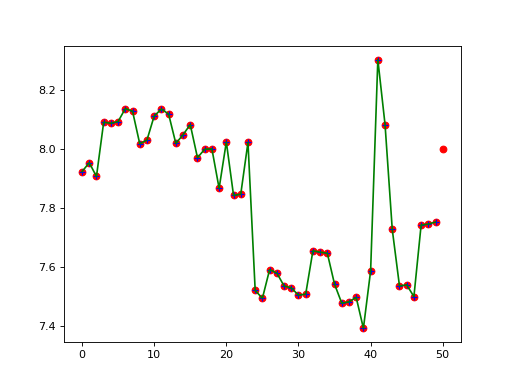

In [274]:
pl.figure()
pl.plot(g[feature_name].values, 'ro')
pl.plot(vals, 'b+')

out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)

pl.plot(out_s, 'g-')

In [278]:
p_=[]
for trial, g in pupiltraces.groupby(['trial']):
    if len(g[feature_name]) < min_nframes:
        npad = min_nframes - len(g[feature_name])
        vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
    else:
        vals = g[feature_name].values[0:min_nframes]
    #print(len(vals))
    out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)
    
    currconfig = g['config'].unique()[0]
    new_stim_on = (iti_pre_ms/1E3)*out_rate 
    pdf = pd.DataFrame({feature_name: out_s})
    
    pdf['stim_on'] = new_stim_on
    pdf['config'] = currconfig
    pdf['trial'] = trial
    p_.append(pdf)


In [304]:
g.shape

(51, 11)

In [281]:
print(trial)
if len(g[feature_name]) < min_nframes:
    npad = min_nframes - len(g[feature_name])
    vals = np.pad(g[feature_name].values, pad_width=((0, npad)), mode='edge')
else:
    vals = g[feature_name].values[0:min_nframes]
#print(len(vals))
out_ixs, out_s = dlcutils.resample_traces(vals, in_rate=in_rate, out_rate=out_rate)

1280


In [319]:
importlib.reload(dlcutils)


<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [320]:
binned_pupil = binned_pupil = dlcutils.bin_pupil_traces(pupiltraces, #feature_name=feature_name,          
                                        in_rate=in_rate, out_rate=out_rate,  
                                        min_nframes=desired_nframes, iti_pre_ms=iti_pre_ms)


In [321]:
binned_pupil.head()


,pupil_maj,pupil_min,pupil_area,run_label,run_num,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,config,frame_ix
0,5.228245,4.789329,78.664809,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,0
1,5.260439,4.828499,79.796533,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,1
2,5.277987,4.799067,79.574692,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,2
3,5.285391,4.815598,79.960813,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,3
4,5.343534,4.815553,80.839691,1.0,1.0,1,500.0,1000.0,1000.0,2000.0,20.0,config030,4


In [322]:
incl_ixs = np.arange(new_stim_on, new_stim_on+nframes_on).astype(int)

for t, g in binned_pupil.groupby(['trial']):
    g

In [331]:
incl_ixs = np.arange(new_stim_on, new_stim_on+nframes_on).astype(int)
print(len(incl_ixs))

g['frame_ix'].isin(incl_ixs).mean()


10


0.2

In [332]:
incl_ixs

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [353]:
dfs2 = pd.concat([g[g['frame_ix'].isin(incl_ixs)].mean() \
           for t, g in binned_pupil.groupby(['trial'])], axis=1).T
dfs2.head()


,pupil_maj,pupil_min,pupil_area,run_label,run_num,trial,stim_dur_ms,pre_iti_ms,post_iti_ms,actual_iti_ms,stim_on,frame_ix
0,5.024241,4.915799,77.585163,1.0,1.0,1.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
1,8.181423,7.173021,184.362163,1.0,1.0,2.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
2,8.633710,7.402814,200.823032,1.0,1.0,3.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
3,8.345367,7.191403,188.554539,1.0,1.0,4.0,500.0,1000.0,1000.0,2000.0,20.0,24.5
4,7.621890,6.615875,158.466496,1.0,1.0,5.0,500.0,1000.0,1000.0,2000.0,20.0,24.5


In [355]:
np.where(dfs2['pupil_maj']!=pupildf[feature_name].values)

(array([793]),)

In [356]:
dfs2['pupil_maj']

0       5.024241
1       8.181423
2       8.633710
3       8.345367
4       7.621890
          ...   
1274    4.767051
1275    6.257644
1276    7.362364
1277    6.118671
1278    7.699233
Name: pupil_maj, Length: 1279, dtype: float64

In [359]:
dfs2[feature_name].loc[793]

nan

In [358]:
pupildf[feature_name].loc[793]

nan

<IPython.core.display.Javascript object>


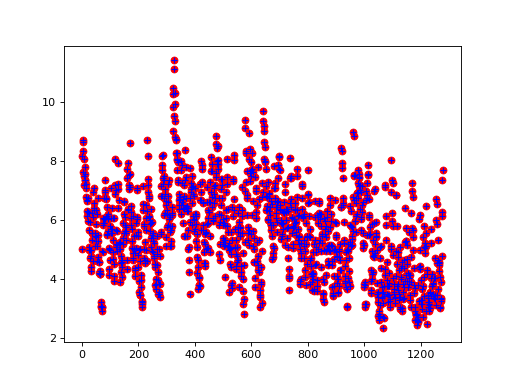

In [354]:
pl.figure()
pl.plot(dfs2['pupil_maj'].values, 'ro')
pl.plot(pupildf[feature_name].values, 'b+') #g_r

In [279]:
pupildfs = pd.concat(p_, axis=0).reset_index(drop=True)

In [280]:
pupildfs

,pupil_maj,stim_on,config,trial
0,5.228245,20.0,config030,1
1,5.260439,20.0,config030,1
2,5.277987,20.0,config030,1
3,5.285391,20.0,config030,1
4,5.343534,20.0,config030,1
...,...,...,...,...
63945,7.540769,20.0,config027,1280
63946,7.500896,20.0,config027,1280
63947,7.742641,20.0,config027,1280
63948,7.746040,20.0,config027,1280


In [338]:
    trials_ = sorted(pupiltraces['trial'].unique())
    frames_ = np.arange(0, desired_nframes)

    pupil_trialmat = pd.DataFrame(np.vstack([p[feature_name].values for trial, p in binned_pupil.groupby(['trial'])]),
                                  index=trials_, columns=frames_)
    pupil_r = pupil_trialmat.T.unstack().reset_index().rename(columns={'level_0': 'trial', 
                                                                       'level_1': 'frame',
                                                                       0: feature_name})
    pupil_r['frame_int'] = [int(round(f)) for f in pupil_r['frame']]
    interp_frame_ixs = list(sorted(pupil_r['frame'].unique()))
    pupil_r['frame_ix'] = [interp_frame_ixs.index(f) for f in pupil_r['frame']]
    pupil_r.shape

(63950, 5)

In [339]:
pupil_r

,trial,frame,pupil_maj,frame_int,frame_ix
0,1,0,5.228245,0,0
1,1,1,5.260439,1,1
2,1,2,5.277987,2,2
3,1,3,5.285391,3,3
4,1,4,5.343534,4,4
...,...,...,...,...,...
63945,1280,45,7.540769,45,45
63946,1280,46,7.500896,46,46
63947,1280,47,7.742641,47,47
63948,1280,48,7.746040,48,48


In [341]:
        pupildf = dlcutils.get_pupil_df(pupil_r, trial_epoch=pupil_epoch, 
                                new_stim_on=new_stim_on, nframes_on=nframes_on)
    

In [342]:
pupildf

,trial,frame,pupil_maj,frame_int,frame_ix
0,1.0,24.5,5.024241,24.5,24.5
1,2.0,24.5,8.181423,24.5,24.5
2,3.0,24.5,8.633710,24.5,24.5
3,4.0,24.5,8.345367,24.5,24.5
4,5.0,24.5,7.621890,24.5,24.5
...,...,...,...,...,...
1274,1276.0,24.5,4.767051,24.5,24.5
1275,1277.0,24.5,6.257644,24.5,24.5
1276,1278.0,24.5,7.362364,24.5,24.5
1277,1279.0,24.5,6.118671,24.5,24.5
